# Math 3910: Optimal Estimation and Control  |  Luenberger Example

## Problem/Assignment Overview

In this code, we consider building a Luenberger Observer for the "train car on a track" problem.  Here, we consider a train car that is modeled by 
$$\dot{\vec{x}} = \underbrace{\begin{bmatrix} 0& 1\\0 & 0\end{bmatrix}}_{A}\vec{x} + \underbrace{\begin{bmatrix}0\\1\end{bmatrix}}_{B}u, \qquad \vec{x}(t_0) = \vec{x}_0$$
$$\vec{y} = \underbrace{\begin{bmatrix}1&0\end{bmatrix}}_{C}\vec{x}$$

In the above, the only thing that we can estimate or observe is the position.  We would like to be able to estimate the full state which includes the velocity. In order to estimate these, we consider the following estimate equation given by 
$$\dot{\hat{\vec{x}}} = F\hat{\vec{x}} + G\vec{u} + H\vec{y}.$$
If we define the error to be $\vec{e} = \vec{x} - \hat{\vec{x}}$, then the evolution of $\vec{e}$ is given by 
\begin{align*}
\dot{\vec{e}} &= \underbrace{A\vec{x} + B\vec{u}}_{\dot{\vec{x}}} - \underbrace{\left(F\hat{\vec{x}} + G\vec{u} + H\vec{y}\right)}_{\dot{\hat{\vec{x}}}}\\\\
&= A\vec{x} + B\vec{u} - F\hat{\vec{x}} - G\vec{u} - HC\vec{x}\\
&= \left(A - HC\right)\vec{x} + \left(B-G\right)\vec{u} - F\hat{\vec{x}} \qquad \longrightarrow\qquad\textsf{ choose $F = A-HC$ and $G = B$}\\
&= \left(A - HC\right)\left(\vec{x}-\hat{\vec{x}}\right)\\
\dot{\vec{e}}&= \left(A - HC\right)\vec{e}
\end{align*}
The matrix $H$ is chosen to force the error between the estimate $\hat{\vec{x}}$ and the true state $\vec{x}$ to go to zero as $t$ increases.  This ensures that regardless of the initial condition $\hat{\vec{x}}(t_0) = \hat{\vec{x}}_0$, the error defined as $\vec{e} = \vec{x} - \hat{\vec{x}}$ satisfies $\vec{e}\to\vec{0}$ as $t \to \infty$.  



## The Code

### Preliminaries and Matrix Definitions

In the section below, we define the 

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
plt.rcParams['text.usetex'] = True


# Define the matrices for the model.  
A = np.array([[0., 1.],[0., 0.]]);
B = np.array([[0.],[1.]]);
C = np.array([[1,0]])

# Define the input control
def u(t):
    return np.array([[-np.sin(t)]])


# Define the matrices F, G, and H and check that the eigenvalues of F = A - HC have negative real part
G = B
H = np.array([[16],[64]])  
F = A - H@C
eVals = np.linalg.eigvals(F);

if np.max(eVals.real)<0:
    print(\t'SUCCESS!\n\t The eigenvalues of A - HC have negative real part and are given by: \n \t [lambda_1   lambda_2] = ' + str(eVals))
else:
    print('WARNING!\n\t At least one eigenvalue of A - HC is greater than or equal to zero.  The eigenvalues are given by: \n \t [lambda_1   lambda_2] = ' + str(eVals))



# Set up the parameters for model.   
t0 = 0;
tf = 10;
numSteps = 101
tV = np.linspace(t0,tf,numSteps)
dt = tV[1]-tV[0]
x0 = np.array([[1],[1]])


# Initialize the true state vector
x = np.zeros((numSteps,2,1)); 
x[0,:,:] = x0

# Initialize the estimated state via the observer (xHat) and via finite-differences (xEst)
xHat = np.zeros((numSteps,2,1))
xEst = np.zeros((numSteps,2,1))


# Simulate the system and build the estimates
for j in range(0,numSteps-1):
    # Simulating the True System
    t = tV[j];
    x[j+1,:,:] = x[j,:,:] + dt*(A@x[j,:,:] + B@u(t))

    # Get the observation
    y = C@x[j,:,:]

    # Build the estimation of xHat
    xHat[j+1,:,:] = xHat[j,:,:] + dt*(F@xHat[j,:,:] + G@u(t) + H@y)

    # Using finite differences to estimate the velocity (just for fun)
    xEst[j+1,:,:] = xHat[j+1,:,:]; xEst[j+1,1,:] = (xHat[j+1,0,:]-xHat[j,0,:])/dt



SUCCESS!
	 The eigenvalues of A - HC have negative real part and are given by: 
 	 [lambda_1   lambda_2] = [-8.+7.3898712e-08j -8.-7.3898712e-08j]


## Plotting the Output

In [ ]:
plt.figure(figsize=(16, 8))

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Plot the actual trajectories for the position and velocity
plt.plot(tV,x.reshape(numSteps,2),color=['tab:orange','tab:blue'])
plt.plot(tV,xHat.reshape(numSteps,2),'--')
plt.plot(tV,xEst.reshape(numSteps,2),'.')

plt.legend([r'True Position $x_1$',r'True Velocity $x_2$', r'Estimated Position $\hat{x}_1$',r'Estimated Velcocity $\hat{x}_2$',r'Finite Difference Position',r'Finite difference velocity'])
# The following line restarts the color cycles so that the actual and desired trajectories have the same colors
plt.gca().set_prop_cycle(None) 


plt.xlabel(r'$t$', fontsize=24)
plt.ylabel(r'output', fontsize=24)
plt.title(r'Plot of the position and velocity',fontsize=28)
plt.grid()
plt.show()




KeyboardInterrupt: 

: 

: 

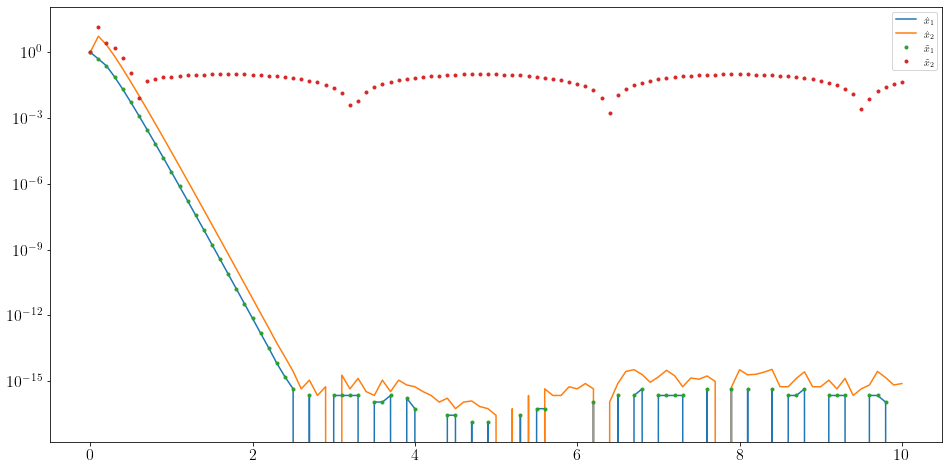

: 

In [ ]:
plt.figure(figsize=(16, 8))

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Plot the actual trajectories for the position and velocity
plt.semilogy(tV,np.abs(x.reshape(numSteps,2)-xHat.reshape(numSteps,2)))

plt.semilogy(tV,np.abs(x.reshape(numSteps,2)-xEst.reshape(numSteps,2)),'.')
plt.legend([r'$\hat{x}_1$',r'$\hat{x}_2$',r'$\tilde{x}_1$',r'$\tilde{x}_2$'])
plt.show()

: 